Используемые библиотеки:

In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import time

Реализация метода Гаусса:

In [2]:
def gauss_method(A, b):
    # Get the size of the system
    n = len(b)

    # Gaussian elimination with partial pivoting
    for i in range(n):
        # Find the maximum element in the current column
        max_el = abs(A[i][i])
        max_row = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > max_el:
                max_el = abs(A[k][i])
                max_row = k

        # Swap rows to bring the maximum element to the diagonal position
        for k in range(i, n):
            tmp = A[max_row][k]
            A[max_row][k] = A[i][k]
            A[i][k] = tmp
        tmp = b[max_row]
        b[max_row] = b[i]
        b[i] = tmp

        # Perform row operations to eliminate variables below the diagonal
        for k in range(i + 1, n):
            c = -A[k][i] / A[i][i]
            for j in range(i, n):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]
            b[k] += c * b[i]

    # Back substitution to solve for x
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
        x[i] /= A[i][i]

    return x

Реализация метода LU-разложения:

In [3]:
def LU_method(A, b):
    # Create a matrix for storing the LU decomposition
    lu_matrix = np.matrix(np.zeros([A.shape[0], A.shape[1]]))
    n = A.shape[0]

    # LU decomposition
    for k in range(n):
        # Calculate all residual elements in the k-th row
        for j in range(k, n):
            lu_matrix[k, j] = A[k, j] - lu_matrix[k, :k] * lu_matrix[:k, j]
        # Calculate all residual elements in the k-th column
        for i in range(k + 1, n):
            lu_matrix[i, k] = (A[i, k] - lu_matrix[i, : k] * lu_matrix[: k, k]) / lu_matrix[k, k]

    # Forward substitution to solve for y
    y = np.matrix(np.zeros([lu_matrix.shape[0], 1]))
    for i in range(y.shape[0]):
        y[i, 0] = b[i] - lu_matrix[i, :i] * y[:i]

    # Back substitution to solve for x
    x = np.matrix(np.zeros([lu_matrix.shape[0], 1]))
    for i in range(1, x.shape[0] + 1):
        x[-i, 0] = (y[-i] - lu_matrix[-i, -i:] * x[-i:, 0]) / lu_matrix[-i, -i]

    return np.ravel(x)

Реализация метода Зейделя:

In [4]:
def seidel_method(A, b, eps=1e-10, iters = 1e20):
    n = len(A)
    x = np.zeros(n)  # Initialize the solution vector with zeros
    count_iters = 0
    while count_iters < iters:
        x_new = np.copy(x)  # Create a copy of the current solution vector
        for i in range(n):
            # Calculate the two summation terms in the iterative formula
            s1 = sum(A[i][j] * x_new[j] for j in range(i))  # Summation of A[i][j] * x_new[j] for j < i
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))  # Summation of A[i][j] * x[j] for j > i
            x_new[i] = (b[i] - s1 - s2) / A[i][i]  # Update the value of x[i] using the iterative formula

        # Check for convergence by calculating the Euclidean norm of the difference between x_new and x
        if np.linalg.norm(x_new - x) <= eps:
            return x
        x = x_new  # Update the solution vector
        count_iters += 1

    return x

Генераторы матриц и векторов:

In [5]:
def generate_matrix(k, n):
    A = np.zeros((n, n))
    # Generation of non-diagonal elements
    for i in range(n):
        for j in range(n):
            if i != j:
                A[i, j] = np.random.choice([0, -1, -2, -3, -4])

    # Generation of diagonal elements
    for i in range(n):
        if i == 0:
            A[i, i] = -np.sum(A[i, 0:]) + 10 ** (-k)
        else:
            A[i, i] = -np.sum(A[i, 0:])
    return A


def generate_vector(n):
    return np.arange(1, n + 1)

Генератор матриц Гильберта:

In [6]:
def generate_hilbert_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i][j] = 1.0 / (i + j + 1)  # Calculate the (i, j)-th element of the Hilbert matrix
    return A

Оценка зависимости числа обусловленности в зависимости от параметра k:

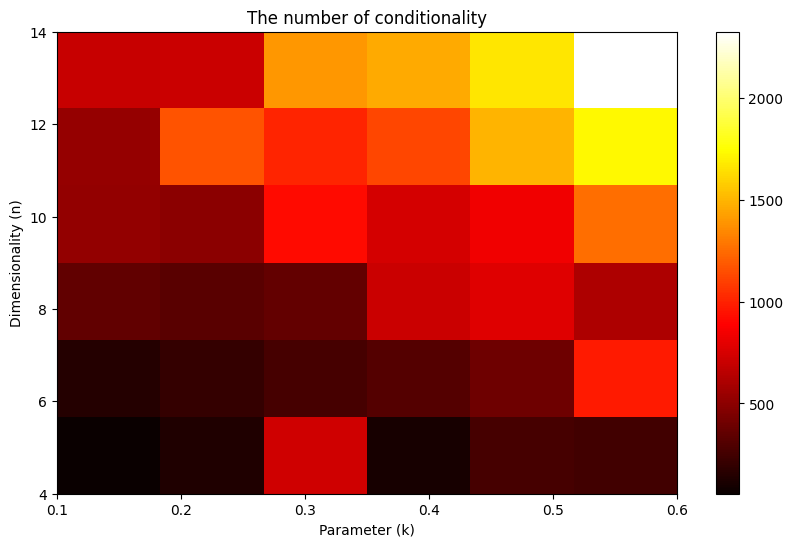

In [7]:
n_values = [4, 6, 8, 10, 12, 14]
k_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

num_conditional = np.zeros((len(n_values), len(k_values)))
num_experiments = 5

# Calculate the number of conditionality for different n and k values
for n_idx, n in enumerate(n_values):
    for k_idx, k in enumerate(k_values):
        total_conditional = 0
        for i in range(num_experiments):
            A = generate_matrix(k, n)  # Generate the matrix A
            cond = np.linalg.cond(A)  # Calculate the condition number of A
            total_conditional += cond
        num_conditional[n_idx, k_idx] = total_conditional / num_experiments

# Plot the number of conditionality
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(num_conditional, extent=[min(k_values), max(k_values), min(n_values), max(n_values)], aspect='auto',
               cmap='hot', origin='lower')
ax.set_xlabel('Parameter (k)')
ax.set_ylabel('Dimensionality (n)')
ax.set_title('The number of conditionality')
fig.colorbar(im)
plt.show()

Оценка зависимости точности полученного решения в зависимости от параметра k:

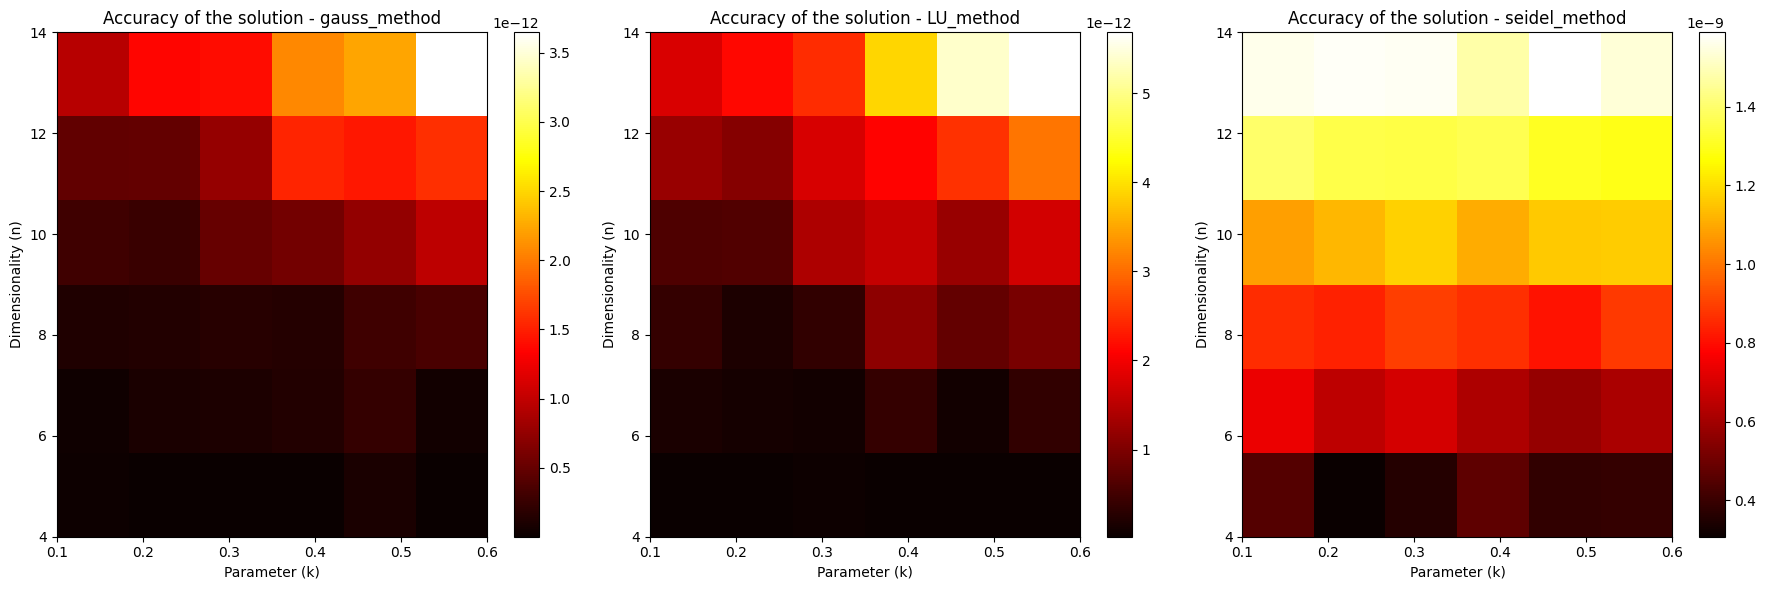

In [8]:
n_values = [4, 6, 8, 10, 12, 14]
k_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

methods = ['gauss_method', 'LU_method', 'seidel_method']
num_accuracy = np.zeros((len(methods), len(n_values), len(k_values)))
num_experiments = 5

# Calculate the accuracy of the solution for different methods, n, and k values
for method_idx, method in enumerate(methods):
    for n_idx, n in enumerate(n_values):
        for k_idx, k in enumerate(k_values):
            total_accuracy = 0
            for i in range(num_experiments):
                A = generate_matrix(k, n)  # Generate the matrix A
                b = generate_vector(n)  # Generate the vector b
                x = 0
                if method == 'gauss_method':
                    x = gauss_method(A, b)  # Solve the system using Gauss method
                elif method == 'LU_method':
                    x = LU_method(A, b)  # Solve the system using LU method
                elif method == 'seidel_method':
                    x = seidel_method(A, b)  # Solve the system using Seidel method

                total_accuracy += np.linalg.norm(A.dot(x) - b)  # Calculate the accuracy of the solution

            num_accuracy[method_idx, n_idx, k_idx] = total_accuracy / num_experiments

# Plot the accuracy of the solution for different methods
fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(18, 6))

for method_idx, method in enumerate(methods):
    ax = axes[method_idx]
    im = ax.imshow(num_accuracy[method_idx], extent=[min(k_values), max(k_values), min(n_values), max(n_values)],
                   aspect='auto', cmap='hot', origin='lower')
    ax.set_xlabel('Parameter (k)')
    ax.set_ylabel('Dimensionality (n)')
    ax.set_title('Accuracy of the solution - {}'.format(method))
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

Оценка зависимости числа обусловленности в зависимости от параметра n для матриц Гильберта:

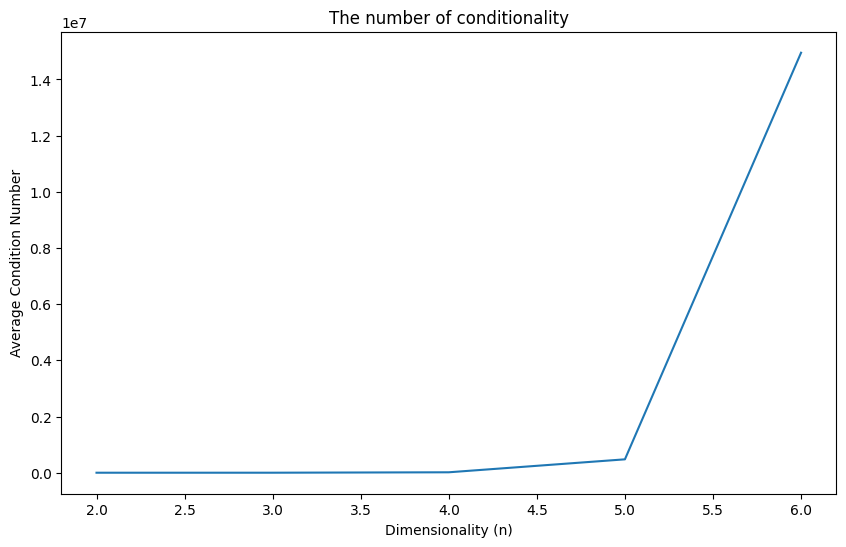

In [9]:
n_values = [2, 3, 4, 5, 6]

num_conditional = np.zeros((len(n_values)))

for n_idx, n in enumerate(n_values):
    A = generate_hilbert_matrix(n)
    cond = np.linalg.cond(A)
    num_conditional[n_idx] = cond

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_values, num_conditional)
ax.set_xlabel('Dimensionality (n)')
ax.set_ylabel('Average Condition Number')
ax.set_title('The number of conditionality')
plt.show()

Оценка зависимости точности полученного решения в зависимости от параметра n для матриц Гильберта:

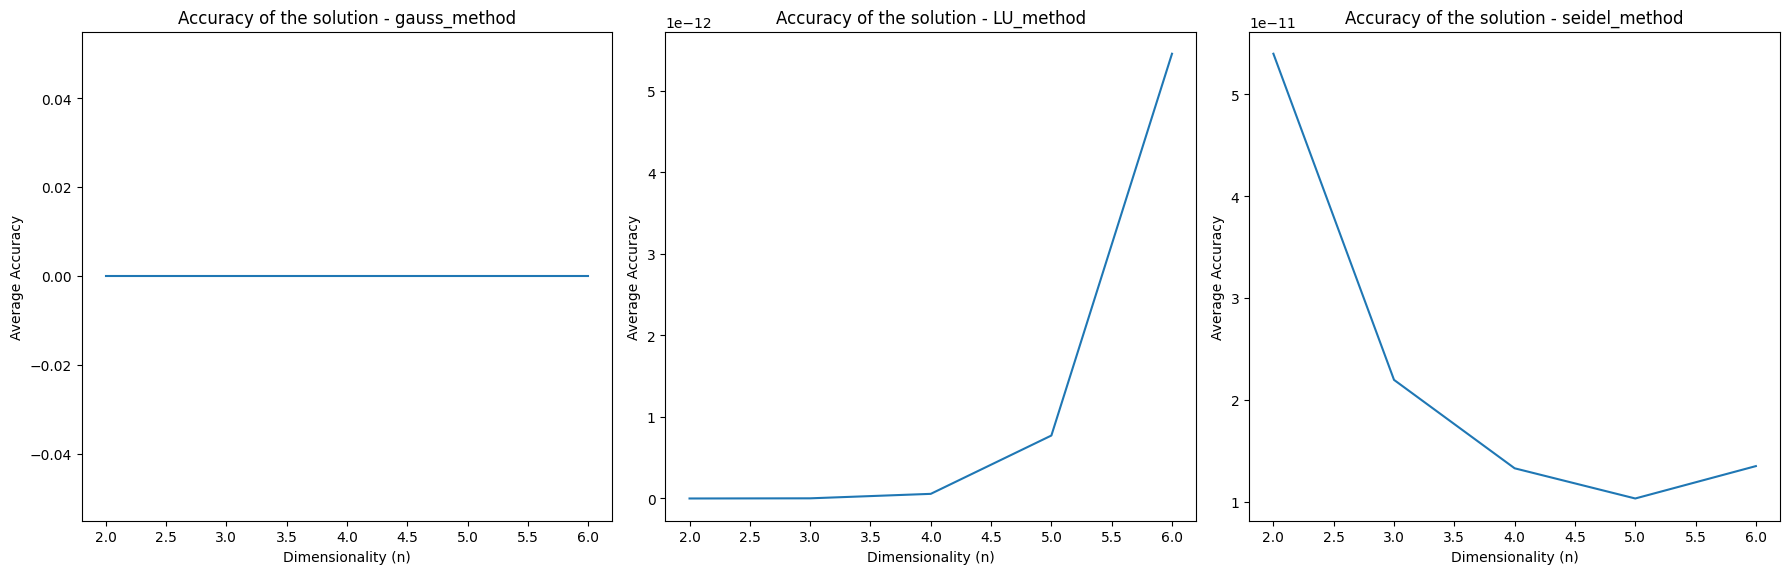

In [10]:
n_values = [2, 3, 4, 5, 6]

methods = ['gauss_method', 'LU_method', 'seidel_method']
num_accuracy = np.zeros((len(methods), len(n_values)))

for method_idx, method in enumerate(methods):
    for n_idx, n in enumerate(n_values):
        A = generate_hilbert_matrix(n)
        b = generate_vector(n)
        x = 0
        if method == 'gauss_method':
            x = gauss_method(A, b)
        elif method == 'LU_method':
            x = LU_method(A, b)
        elif method == 'seidel_method':
            x = seidel_method(A, b)

        total_accuracy = np.linalg.norm(A.dot(x) - b)

        num_accuracy[method_idx, n_idx] = total_accuracy

fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(18, 6))

for method_idx, method in enumerate(methods):
    ax = axes[method_idx]
    ax.plot(n_values, num_accuracy[method_idx])
    ax.set_xlabel('Dimensionality (n)')
    ax.set_ylabel('Average Accuracy')
    ax.set_title('Accuracy of the solution - {}'.format(method))

plt.tight_layout()
plt.show()

Сравнение прямых и итерационного метода по эффективности методов от размеров n матрицы, удовлетворяющей условию строгой диагональной доминированности:

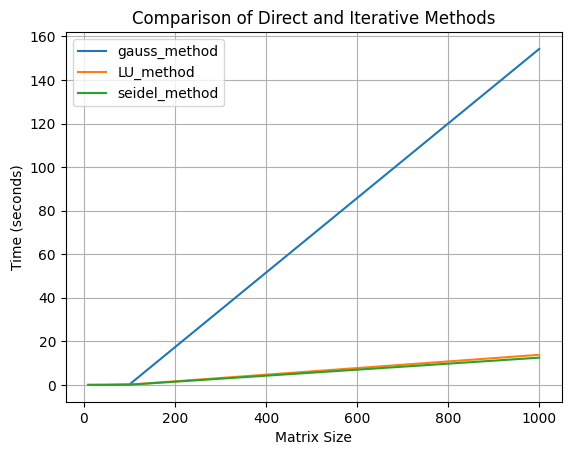

In [11]:
def measure_time(method, A, b):
    start_time = time.time()
    x = method(A, b)
    end_time = time.time()
    return x, end_time - start_time

matrix_sizes = [10, 20, 50, 100, 1000]

direct1_times = []
direct2_times = []
iterative_times = []

for size in matrix_sizes:
    A = generate_matrix(0.001, size)
    b = generate_vector(size)

    _, direct1_time = measure_time(gauss_method, A, b)
    direct1_times.append(direct1_time)

    _, direct2_time = measure_time(LU_method, A, b)
    direct2_times.append(direct2_time)

    _, iterative_time = measure_time(seidel_method, A, b)
    iterative_times.append(iterative_time)


plt.plot(matrix_sizes, direct1_times, label='gauss_method')
plt.plot(matrix_sizes, direct2_times, label='LU_method')
plt.plot(matrix_sizes, iterative_times, label='seidel_method')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Direct and Iterative Methods')
plt.legend()
plt.grid(True)
plt.show()

Сравнение прямых и итерационного метода по эффективности методов от размеров n матрицы:

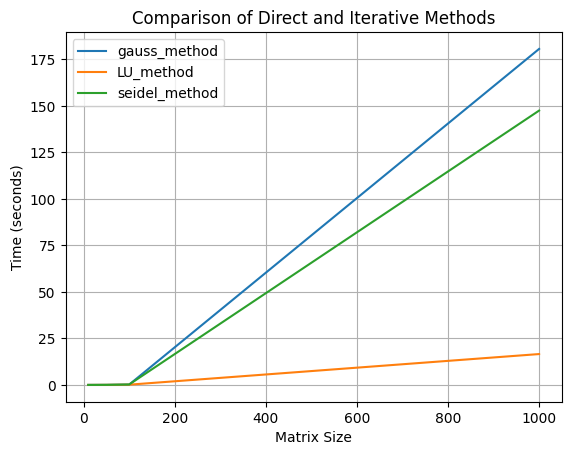

In [12]:
def generate_random_matrix(n):
    return np.random.rand(n, n)

matrix_sizes = [10, 20, 50, 100, 1000]

direct1_times = []
direct2_times = []
iterative_times = []

for size in matrix_sizes:
    A = generate_random_matrix(size)
    b = np.random.rand(size)

    _, direct1_time = measure_time(gauss_method, A, b)
    direct1_times.append(direct1_time)

    _, direct2_time = measure_time(LU_method, A, b)
    direct2_times.append(direct2_time)

    _, iterative_time = measure_time(seidel_method, A, b)
    iterative_times.append(iterative_time)


plt.plot(matrix_sizes, direct1_times, label='gauss_method')
plt.plot(matrix_sizes, direct2_times, label='LU_method')
plt.plot(matrix_sizes, iterative_times, label='seidel_method')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Direct and Iterative Methods')
plt.legend()
plt.grid(True)
plt.show()